In [1]:
# This is an example of running the model through a twitch

In [2]:
import json as json
import matplotlib.pyplot as plt
import os

In [3]:
import multifil

imported myosin multifil


In [4]:
hs = multifil.hs.hs()
forces = hs.run(10)


MainProcess finished timestep 1 of 10, 0h0m1s left
MainProcess finished timestep 2 of 10, 0h0m1s left
MainProcess finished timestep 3 of 10, 0h0m1s left
MainProcess finished timestep 4 of 10, 0h0m1s left
MainProcess finished timestep 5 of 10, 0h0m1s left
MainProcess finished timestep 6 of 10, 0h0m0s left
MainProcess finished timestep 7 of 10, 0h0m0s left
MainProcess finished timestep 8 of 10, 0h0m0s left
MainProcess finished timestep 9 of 10, 0h0m0s left
MainProcess finished timestep 10 of 10, 0h0m0s left

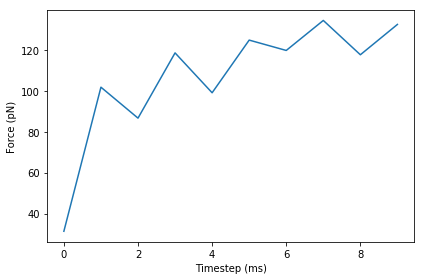

In [5]:
fig, ax = plt.subplots(1,1)
ax.plot(forces)
ax.set(xlabel="Timestep (ms)", ylabel="Force (pN)")
plt.tight_layout()

In [6]:
time_trace = multifil.aws.metas.time(
    .5, # ms per timestep
    50, # ms to run for
                                    )
length_trace = multifil.aws.metas.zline_workloop(
    1200, # resting hs length 
    10, # peak to peak amp 
    25, # cycle freq in Hz 
    time_trace
                                                )

'''init params freq=25, phase=0.1, stim_duration=20, influx_time=2, half_life=10, time=time'''
'''first twitch: 5, 10, 50, 2, 10'''
'''positive workloop params: 25, # freq in Hz, 0.1, # phase offset, 10, # stimulus duration in ms
    2, # time it takes for ca to go from 10 to 90% of influx level, 10, # half life of Ca decay, time_trace'''
actin_permissiveness_trace = multifil.aws.metas.actin_permissiveness_workloop(
    25, # freq in Hz 
    0.1, # phase offset 
    20, # stimulus duration in ms
    2, # time it takes for ca to go from 10 to 90% of influx level
    10, # half life of Ca decay 
    time_trace
                                                                             )

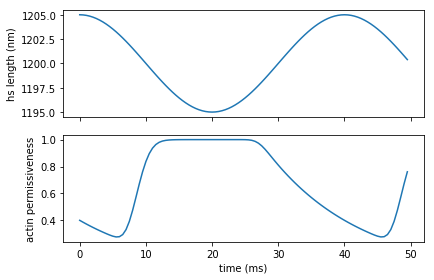

In [7]:
fig, axes = plt.subplots(2,1,sharex=True)
axes[0].plot(time_trace, length_trace)
axes[0].set(ylabel='hs length (nm)')
axes[1].plot(time_trace, actin_permissiveness_trace)
axes[1].set(ylabel='actin permissiveness',
           xlabel='time (ms)')
plt.tight_layout()

In [8]:
output_dir = "../_multifilOutput/"

wl_meta = multifil.aws.metas.emit(output_dir, # local dir to save run output to
                                  None, #s3 bucket to upload results to
                                  time_trace, 
                                  0.5, # poisson ratio, set to const vol here
                                 None, # intial ls, using default by passing none
                                 length_trace, 
                                 actin_permissiveness_trace, 
                                 "an example run", # comment describing run
                                 True, # whether to write out resulting file 
                                  #or just pass back to variable
                                 )
run_name = wl_meta['name']
print(run_name)

ebb04e14-5de5-11ea-846e-185680feb82e


In [9]:
run_file = output_dir + run_name + ".meta.json"
run = multifil.aws.run.manage(run_file, False)

In [10]:
# Begin running
run.run_and_save()

run.py MainProcess # ## finished 1/100 steps, 0h0m16s left


C:\Users\Anthony\Documents\github\fd_multifil\multifil\multifil\ti.py:153: UserWarning: Check radial force direction in titin
  warnings.warn("Check radial force direction in titin")


KeyboardInterrupt: 

In [ ]:
print(run_name)
data_name = run_file.split('.meta')[0] + '.data.json'

with open(data_name, 'r') as file:
    data = json.load(file)

In [ ]:
import originalWorkAndWorkloops as work_and_workloops
import work_and_workloops

fig, ax = plt.subplots(1,1)
work_and_workloops.workloop_plot(ax, data['z_line'], data['axial_force'])